<a href="https://colab.research.google.com/github/kathulavigneshwari96-art/Heart-Disease-Detection/blob/main/heart_disease_detection3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded Successfully!
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


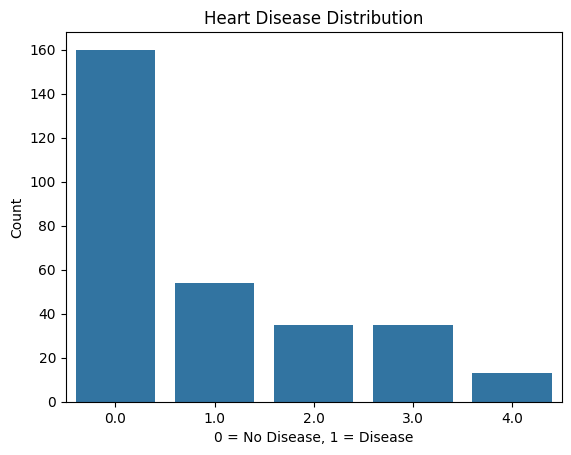

Accuracy: 0.6166666666666667
Confusion Matrix:
 [[35  1  0  0  0]
 [ 5  1  3  0  0]
 [ 2  1  1  1  0]
 [ 1  3  2  0  1]
 [ 1  1  0  1  0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.97      0.88        36
         1.0       0.14      0.11      0.12         9
         2.0       0.17      0.20      0.18         5
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.22      0.26      0.24        60
weighted avg       0.51      0.62      0.56        60



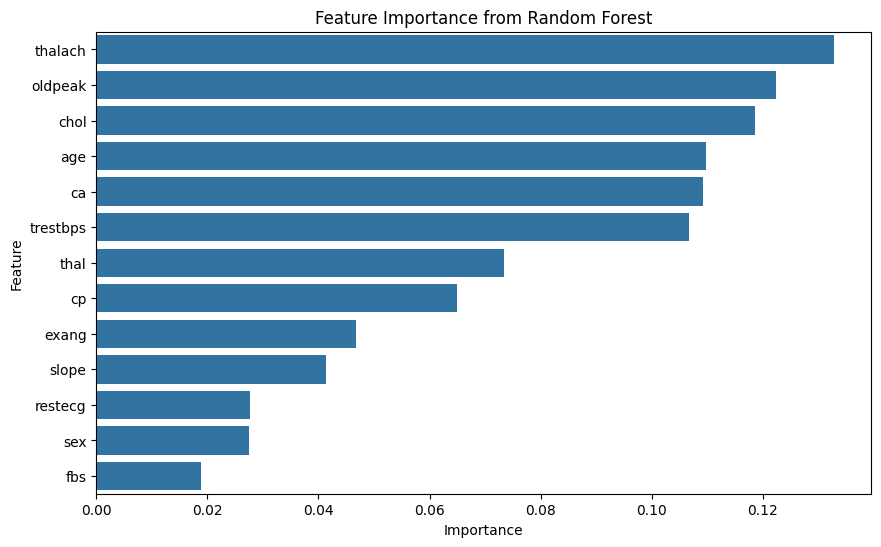

The patient does not have heart disease.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load Dataset directly from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
data = pd.read_csv(url, names=column_names)

print("Dataset Loaded Successfully!")
print(data.head())

# Step 2.1: Handle missing values (replace '?' with NaN and drop rows)
data = data.replace('?', pd.NA)
data = data.dropna()
data = data.astype(float) # Convert all columns to float after handling NA

# Step 3: Visualize Target Distribution
sns.countplot(x="target", data=data)
plt.title("Heart Disease Distribution")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.show()

# Step 4: Separate features and target
X = data.drop("target", axis=1)
y = data["target"]

# Step 5: Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train Random Forest Classifier (fast version)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train) # Train on the cleaned data

# Step 8: Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Feature Importance Visualization
importances = rf_model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_df)
plt.title("Feature Importance from Random Forest")
plt.show()

# Step 10: Predict a New Patient
# The new patient data should match the feature columns after dropping rows with NaNs and converting to float
new_patient = [[63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0]]  # Example patient data
new_patient_scaled = scaler.transform(new_patient)
prediction = rf_model.predict(new_patient_scaled)

if prediction[0] == 1:
    print("The patient has heart disease.")
else:
    print("The patient does not have heart disease.")